In [22]:
import pandas as pd

In [23]:
# File paths
survey_path = "./data_cleaned_capped/survey.csv"
ridership_path = "./data_cleaned_capped/ridership.csv"
arrival_path = "./data_cleaned_capped/arrival_departure.parquet"

# laoding
survey_df = pd.read_csv(survey_path)
ridership_df = pd.read_csv(ridership_path)
arrival_departure_df = pd.read_parquet(arrival_path)

# print shapes 
print("survey_df:", survey_df.shape)
print("ridership_df:", ridership_df.shape)
print("arrival_departure_df:", arrival_departure_df.shape)


display(survey_df.head())
display(ridership_df.head())
display(arrival_departure_df.head())

/var/folders/zs/0gklbd017c758v1gqchfcyk00000gn/T/ipykernel_2188/277206012.py:8: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  ridership_df = pd.read_csv(ridership_path)


survey_df: (2335, 9)
ridership_df: (3327451, 17)
arrival_departure_df: (12682058, 14)


,aggregation_level,service_mode,reporting_group,measure_group,measure,category,weighted_percent,ObjectId,route_id
0,Reporting Group,Bus,10,Alternative Modes,Alternative Mode,Drive or Ride in a Carpool,0.316855,1,['10']
1,Reporting Group,Bus,10,Alternative Modes,Alternative Mode,"Bike, Scooter, or Other Micromobility",0.000000,2,['10']
2,Reporting Group,Bus,10,Alternative Modes,Alternative Mode,Private Shuttle or Other Transit,0.000000,3,['10']
3,Reporting Group,Bus,10,Alternative Modes,Alternative Mode,Other,0.000000,4,['10']
4,Reporting Group,Bus,10,Alternative Modes,Used Alternative Mode,No,0.837547,5,['10']


,alightings,boardings,day_type_id,day_type_name,direction_id,load_,route_id,route_variant,sample_size,season,stop_id,stop_name,stop_sequence,trip_start_time,source_file,term_from_name,year_from_name
0,0.3,0.4,day_type_01,weekday,0,7.8,1,1-0-0,13,Fall 2016,1,WASHINGTON ST OPP RUGGLES ST,2,04:37:00,MBTA_Bus_Ridership_by_Trip_Season_Route_Line_a...,Fall,2016
1,0.0,0.1,day_type_01,weekday,0,9.4,1,1-0-0,13,Fall 2016,10003,ALBANY ST OPP RANDALL ST,5,04:37:00,MBTA_Bus_Ridership_by_Trip_Season_Route_Line_a...,Fall,2016
2,0.4,0.0,day_type_01,weekday,0,10.4,1,1-0-0,13,Fall 2016,101,MASSACHUSETTS AVE @ SIDNEY ST,19,04:37:00,MBTA_Bus_Ridership_by_Trip_Season_Route_Line_a...,Fall,2016
3,2.5,0.6,day_type_01,weekday,0,8.5,1,1-0-0,13,Fall 2016,102,MASSACHUSETTS AVE @ PROSPECT,20,04:37:00,MBTA_Bus_Ridership_by_Trip_Season_Route_Line_a...,Fall,2016
4,0.2,0.1,day_type_01,weekday,0,8.4,1,1-0-0,13,Fall 2016,104,MASSACHUSETTS AVE @ BIGELOW S,21,04:37:00,MBTA_Bus_Ridership_by_Trip_Season_Route_Line_a...,Fall,2016


,service_date,route_id,stop_id,half_trip_id,time_point_id,time_point_order,actual,scheduled,scheduled_headway,headway,point_type,standard_type,earliness,direction
0,2018-08-01T00:00:00Z,1,75,40121394.0,mit,4.0,1900-01-01T05:19:34Z,1900-01-01T05:19:00Z,NaN,NaN,Midpoint,Schedule,-10.0,inbound
1,2018-08-01T00:00:00Z,1,79,40121394.0,hynes,5.0,1900-01-01T05:23:20Z,1900-01-01T05:22:00Z,NaN,NaN,Midpoint,Schedule,3.0,inbound
2,2018-08-01T00:00:00Z,1,187,40121394.0,masta,6.0,1900-01-01T05:25:58Z,1900-01-01T05:25:00Z,NaN,NaN,Midpoint,Schedule,-33.0,inbound
3,2018-08-01T00:00:00Z,1,59,40121394.0,Wasma,7.0,1900-01-01T05:28:26Z,1900-01-01T05:28:00Z,NaN,NaN,Midpoint,Schedule,7.0,inbound
4,2018-08-01T00:00:00Z,1,110,40121565.0,hhgat,1.0,1900-01-01T05:29:57Z,1900-01-01T05:30:00Z,1200.0,1218.0,Startpoint,Headway,NaN,inbound


### Inspect and Identify Feature Columns

In [24]:
# Overview of all three datasets 

def quick_overview(df, name, sample_cols=8):
    print(f"\n{'='*40}\n{name.upper()} — shape: {df.shape}\n{'='*40}")
    display(df.head(3))
    print("\nColumn summary:")
    display(df.dtypes)
    print("\nMissing values per column:")
    display(df.isna().sum().sort_values(ascending=False).head(sample_cols))
    print("\nUnique route_id examples:")
    if "route_id" in df.columns:
        print(df["route_id"].dropna().unique()[:20])
    elif "reporting_group" in df.columns:
        print(df["reporting_group"].dropna().unique()[:20])

quick_overview(ridership_df, "ridership_df")
quick_overview(arrival_departure_df, "arrival_departure_df")
quick_overview(survey_df, "survey_df")



RIDERSHIP_DF — shape: (3327451, 17)


,alightings,boardings,day_type_id,day_type_name,direction_id,load_,route_id,route_variant,sample_size,season,stop_id,stop_name,stop_sequence,trip_start_time,source_file,term_from_name,year_from_name
0,0.3,0.4,day_type_01,weekday,0,7.8,1,1-0-0,13,Fall 2016,1,WASHINGTON ST OPP RUGGLES ST,2,04:37:00,MBTA_Bus_Ridership_by_Trip_Season_Route_Line_a...,Fall,2016
1,0.0,0.1,day_type_01,weekday,0,9.4,1,1-0-0,13,Fall 2016,10003,ALBANY ST OPP RANDALL ST,5,04:37:00,MBTA_Bus_Ridership_by_Trip_Season_Route_Line_a...,Fall,2016
2,0.4,0.0,day_type_01,weekday,0,10.4,1,1-0-0,13,Fall 2016,101,MASSACHUSETTS AVE @ SIDNEY ST,19,04:37:00,MBTA_Bus_Ridership_by_Trip_Season_Route_Line_a...,Fall,2016



Column summary:


alightings         float64
boardings          float64
day_type_id         object
day_type_name       object
direction_id         int64
load_              float64
route_id            object
route_variant       object
sample_size          int64
season              object
stop_id              int64
stop_name           object
stop_sequence        int64
trip_start_time     object
source_file         object
term_from_name      object
year_from_name       int64
dtype: object


Missing values per column:


load_              1
alightings         0
season             0
term_from_name     0
source_file        0
trip_start_time    0
stop_sequence      0
stop_name          0
dtype: int64


Unique route_id examples:
[1 10 104 11 111 114 116 117 15 16 21 22 23 28 29 32 '32' '34' '34E' '39']

ARRIVAL_DEPARTURE_DF — shape: (12682058, 14)


,service_date,route_id,stop_id,half_trip_id,time_point_id,time_point_order,actual,scheduled,scheduled_headway,headway,point_type,standard_type,earliness,direction
0,2018-08-01T00:00:00Z,1,75,40121394.0,mit,4.0,1900-01-01T05:19:34Z,1900-01-01T05:19:00Z,NaN,NaN,Midpoint,Schedule,-10.0,inbound
1,2018-08-01T00:00:00Z,1,79,40121394.0,hynes,5.0,1900-01-01T05:23:20Z,1900-01-01T05:22:00Z,NaN,NaN,Midpoint,Schedule,3.0,inbound
2,2018-08-01T00:00:00Z,1,187,40121394.0,masta,6.0,1900-01-01T05:25:58Z,1900-01-01T05:25:00Z,NaN,NaN,Midpoint,Schedule,-33.0,inbound



Column summary:


service_date          object
route_id              object
stop_id                int64
half_trip_id         float64
time_point_id         object
time_point_order     float64
actual                object
scheduled             object
scheduled_headway    float64
headway              float64
point_type            object
standard_type         object
earliness            float64
direction             object
dtype: object


Missing values per column:


earliness            9741000
headway              4097754
scheduled_headway    3122705
actual                714622
half_trip_id             535
service_date               0
route_id                   0
stop_id                    0
dtype: int64


Unique route_id examples:
['1' '4' '7' '8' '9' '10' '104' '11' '111' '114' '116' '117' '15' '16'
 '21' '22' '23' '28' '29' '32']

SURVEY_DF — shape: (2335, 9)


,aggregation_level,service_mode,reporting_group,measure_group,measure,category,weighted_percent,ObjectId,route_id
0,Reporting Group,Bus,10,Alternative Modes,Alternative Mode,Drive or Ride in a Carpool,0.316855,1,['10']
1,Reporting Group,Bus,10,Alternative Modes,Alternative Mode,"Bike, Scooter, or Other Micromobility",0.000000,2,['10']
2,Reporting Group,Bus,10,Alternative Modes,Alternative Mode,Private Shuttle or Other Transit,0.000000,3,['10']



Column summary:


aggregation_level     object
service_mode          object
reporting_group       object
measure_group         object
measure               object
category              object
weighted_percent     float64
ObjectId               int64
route_id              object
dtype: object


Missing values per column:


aggregation_level    0
service_mode         0
reporting_group      0
measure_group        0
measure              0
category             0
weighted_percent     0
ObjectId             0
dtype: int64


Unique route_id examples:
["['10']" "['1']" "['104']" "['111']" "['11']" "['21']"
 "['114', '116', '117']" "['15']" "['16']" "['22']" "['28', '29']"
 "['23']" "['32']" "['34', '34E']" "['39']" "['43', 'SL5']" "['4', '7']"
 "['47']" "['57']" "['66']"]


### Aggregate ridership_df per route ID

In [25]:
rider_grp = ridership_df.groupby("route_id", dropna=True)

ridership_feat = pd.DataFrame({
    "boardings_mean": rider_grp["boardings"].mean(),
    "alightings_mean": rider_grp["alightings"].mean(),
    "load_mean": rider_grp["load_"].mean(),
    "boardings_median": rider_grp["boardings"].median(),
    "samples": rider_grp.size()
}).reset_index()

if "direction_id" in ridership_df.columns:
    dir_counts = (
        ridership_df.groupby(["route_id","direction_id"])
        .size()
        .unstack(fill_value=0)
        .rename(columns=lambda c: f"dir_{c}_count")
        .reset_index()
    )
    ridership_feat = ridership_feat.merge(dir_counts, on="route_id", how="left")

print("ridership_feat:", ridership_feat.shape)
display(ridership_feat.head())


ridership_feat: (58, 8)


,route_id,boardings_mean,alightings_mean,load_mean,boardings_median,samples,dir_0_count,dir_1_count
0,1,1.558645,1.558170,13.601183,0.7,141425,70145,71280
1,4,0.663981,0.713270,4.991266,0.1,1477,828,649
2,7,1.124647,1.117405,7.958976,0.1,30543,16125,14418
3,8,0.644464,0.646314,8.332684,0.2,72657,36867,35790
4,9,0.826970,0.823809,8.687067,0.2,93799,46515,47284


### Aggregate arrival_departure_df per route ID

In [26]:
arr = arrival_departure_df.copy()
arr_grp = arr.groupby("route_id", dropna=True)

arrival_feat = pd.DataFrame({
    "headway_mean": arr_grp["headway"].mean(),
    "headway_std": arr_grp["headway"].std(),
    "scheduled_headway_mean": arr_grp["scheduled_headway"].mean(),
    "earliness_mean": arr_grp["earliness"].mean(),
    "stops_count": arr_grp["stop_id"].nunique(),
    "records": arr_grp.size()
}).reset_index()

if "earliness" in arr.columns:
    arr["on_time"] = arr["earliness"].abs() <= 60
    on_time = (
        arr.groupby("route_id")["on_time"]
           .mean()
           .rename("on_time_rate")
           .reset_index()
    )
    arrival_feat = arrival_feat.merge(on_time, on="route_id", how="left")

print("arrival_feat:", arrival_feat.shape)
display(arrival_feat.head())


arrival_feat: (34, 8)


,route_id,headway_mean,headway_std,scheduled_headway_mean,earliness_mean,stops_count,records,on_time_rate
0,1,737.632266,469.237516,727.774157,-51.313495,16,642922,0.003173
1,10,784.192295,410.586677,709.524388,-165.253971,20,209898,0.221508
2,104,828.517231,418.517538,814.017844,-376.184918,12,182186,0.064121
3,11,658.554098,354.260679,653.832547,-167.481935,12,294675,0.122474
4,111,534.235697,398.856199,530.490678,-30.062437,21,1035012,0.002232


### Merge to form unified route-level feature table

In [27]:
route_feat = (
    ridership_feat.merge(arrival_feat, on="route_id", how="inner")
                  .dropna(axis=1, how="all")
)

print("route_feat:", route_feat.shape)
display(route_feat.head())


route_feat: (25, 15)


,route_id,boardings_mean,alightings_mean,load_mean,boardings_median,samples,dir_0_count,dir_1_count,headway_mean,headway_std,scheduled_headway_mean,earliness_mean,stops_count,records,on_time_rate
0,116,1.488029,1.495110,16.521192,0.5,1963,811,1152,1391.977672,725.387931,1372.253298,-35.093486,10,220549,0.007110
1,117,1.393963,1.395319,14.935521,0.5,2286,1083,1203,1689.356480,3804.558273,1682.007552,-18.507893,18,253382,0.007929
2,15,0.697025,0.698322,9.248568,0.3,4470,1943,2527,1008.157806,1698.923312,1001.001042,-73.313435,19,400914,0.004470
3,16,1.295473,1.294819,13.487525,0.5,1988,924,1064,766.331230,437.227041,699.657228,-177.959246,21,256754,0.170712
4,21,1.136508,1.166314,13.107231,0.3,567,273,294,752.669158,402.917429,745.791970,-196.103649,19,207241,0.125424


### Selecting features & scaling them

In [28]:
from sklearn.preprocessing import StandardScaler
import numpy as np

num_cols = route_feat.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric feature columns:", num_cols)

#  scale features 
X = route_feat[num_cols].fillna(route_feat[num_cols].median())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Numeric feature columns: ['boardings_mean', 'alightings_mean', 'load_mean', 'boardings_median', 'samples', 'dir_0_count', 'dir_1_count', 'headway_mean', 'headway_std', 'scheduled_headway_mean', 'earliness_mean', 'stops_count', 'records', 'on_time_rate']


### Determining optimal number of clusters (K)

Silhouette scores: {2: np.float64(0.274), 3: np.float64(0.315), 4: np.float64(0.253), 5: np.float64(0.229), 6: np.float64(0.232), 7: np.float64(0.184), 8: np.float64(0.221)}
Best K = 3 (score = 0.315)


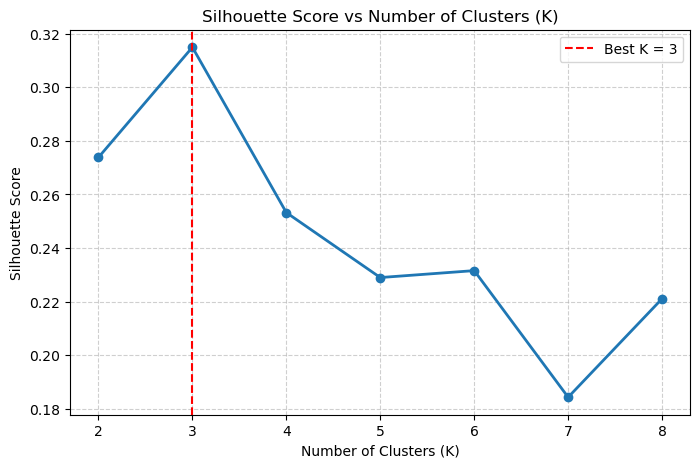

In [30]:
import matplotlib.pyplot as plt

# --- KMeans & Silhouette Calculation ---
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = {}
best_k, best_score = None, -1

for k in [2, 3, 4, 5, 6, 7, 8]:
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)
    labels = km.fit_predict(X_scaled)
    if len(set(labels)) > 1:
        s = silhouette_score(X_scaled, labels)
        scores[k] = s
        if s > best_score:
            best_k, best_score = k, s

print("Silhouette scores:", {k: round(v, 3) for k, v in scores.items()})
print(f"Best K = {best_k} (score = {best_score:.3f})")

plt.figure(figsize=(8, 5))
plt.plot(list(scores.keys()), list(scores.values()), marker='o', linestyle='-', linewidth=2)
plt.title("Silhouette Score vs Number of Clusters (K)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.xticks(list(scores.keys()))
plt.grid(True, linestyle='--', alpha=0.6)
plt.axvline(best_k, color='red', linestyle='--', label=f"Best K = {best_k}")
plt.legend()
plt.show()


### K means

In [31]:
# fit final model 
kmeans = KMeans(n_clusters=best_k, n_init='auto', random_state=42)
route_feat['cluster'] = kmeans.fit_predict(X_scaled)

centroids_unscaled = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=num_cols
)
centroids_unscaled['cluster'] = np.arange(best_k)

print("Cluster centroids (original scale):")
display(centroids_unscaled.round(2))
display(route_feat[['route_id','cluster']].head(10))


Cluster centroids (original scale):


,boardings_mean,alightings_mean,load_mean,boardings_median,samples,dir_0_count,dir_1_count,headway_mean,headway_std,scheduled_headway_mean,earliness_mean,stops_count,records,on_time_rate,cluster
0,0.80,0.80,11.64,0.20,103076.75,49222.75,53854.00,705.97,458.35,690.78,-150.52,27.50,483413.50,0.09,0
1,0.79,0.81,9.48,0.27,7394.74,3743.95,3650.79,779.08,577.55,739.17,-163.61,18.11,382726.21,0.08,1
2,1.44,1.45,15.73,0.50,2124.50,947.00,1177.50,1540.67,2264.97,1527.13,-26.80,14.00,236965.50,0.01,2


,route_id,cluster
0,116,2
1,117,2
2,15,1
3,16,1
4,21,1
5,22,1
6,23,1
7,28,1
8,29,1
9,32,0


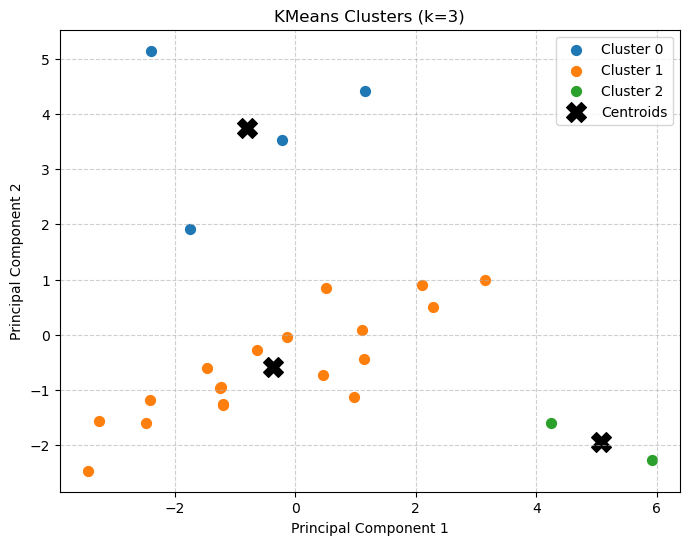

In [33]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# reduce to 2D for visualization 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plot_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
plot_df['cluster'] = route_feat['cluster']

plt.figure(figsize=(8,6))
for c in range(best_k):
    subset = plot_df[plot_df['cluster'] == c]
    plt.scatter(subset['PC1'], subset['PC2'], s=50, label=f'Cluster {c}')
plt.scatter(pca.transform(kmeans.cluster_centers_)[:,0],
            pca.transform(kmeans.cluster_centers_)[:,1],
            s=200, c='black', marker='X', label='Centroids')


plt.title(f'KMeans Clusters (k={best_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


## Checking if there's a pattern using survey_df

### Normalize keys & build long-form survey rows

In [42]:
import re, ast
import pandas as pd

def _normalize_route(val):
    if pd.isna(val): return None
    s = str(val).strip().upper()
    if s.isdigit():
        s = s.lstrip('0') or '0'
    return s

ROUTE_TOKEN_RE = re.compile(r'(SL\d+|CT\d+|\d+[A-Z]?)', flags=re.IGNORECASE)

def _to_route_list(x):
    if isinstance(x, list):
        return [_normalize_route(t) for t in x if t is not None]
    if pd.isna(x):
        return []
    s = str(x).strip()
    # Try parsing "['10', '34E']" style
    if s.startswith('[') and s.endswith(']'):
        try:
            v = ast.literal_eval(s)
            if isinstance(v, list):
                return [_normalize_route(t) for t in v if t is not None]
        except Exception:
            pass
    # Fallback: regex extract tokens like SL1, 34E, 10, etc.
    toks = ROUTE_TOKEN_RE.findall(s.upper())
    return [_normalize_route(t) for t in toks]

survey_long = (
    survey_df
    .assign(route_list=lambda d: d['route_id'].apply(_to_route_list))
    .explode('route_list', ignore_index=True)
    .rename(columns={'route_list': 'route_id_str'})
    .dropna(subset=['route_id_str'])
)

#  normalize the cluster table's key
route_feat_norm = route_feat.copy()
route_feat_norm['route_id_str'] = route_feat_norm['route_id'].apply(_normalize_route)
route_clusters = route_feat_norm[['route_id_str', 'cluster']]

print("survey_long rows:", len(survey_long), "unique routes:", survey_long['route_id_str'].nunique())
print("clustered routes:", route_clusters['route_id_str'].nunique())


survey_long rows: 3197 unique routes: 37
clustered routes: 25


### Select demographic slices (Income & Ethnicity)

In [43]:
income_mask = (
    survey_long['measure_group'].str.contains('INCOME', case=False, na=False) |
    survey_long['measure'].str.contains('INCOME', case=False, na=False) |
    survey_long['category'].str.contains('INCOME', case=False, na=False)
)

eth_mask = (
    survey_long['measure_group'].str.contains('RACE|ETHNIC', case=False, na=False) |
    survey_long['measure'].str.contains('RACE|ETHNIC', case=False, na=False) |
    survey_long['category'].str.contains('RACE|ETHNIC', case=False, na=False)
)

survey_income = survey_long.loc[income_mask, ['route_id_str','category','weighted_percent']]
survey_ethnicity = survey_long.loc[eth_mask, ['route_id_str','category','weighted_percent']]

print("Income rows:", survey_income.shape, "Ethnicity rows:", survey_ethnicity.shape)


Income rows: (356, 3) Ethnicity rows: (481, 3)


### Pivot to route × category matrices and normalize rows to proportions

In [44]:
def _row_normalize(df):
    s = df.sum(axis=1)
    return df.div(s.replace(0, pd.NA), axis=0)

income_pivot = (
    survey_income.pivot_table(index='route_id_str', columns='category',
                              values='weighted_percent', aggfunc='mean')
    .pipe(_row_normalize)
    .reset_index()
)

ethnicity_pivot = (
    survey_ethnicity.pivot_table(index='route_id_str', columns='category',
                                 values='weighted_percent', aggfunc='mean')
    .pipe(_row_normalize)
    .reset_index()
)

print("Income categories:", list(income_pivot.columns))
print("Ethnicity categories:", list(ethnicity_pivot.columns))


Income categories: ['route_id_str', '100% to 140%  of Area Median Income', '130% to 200% of Area Median Income', '200% or more of Area Median Income', '30% to 60% of Area Median Income', '60% to 80% of Area Median Income', '80% to 100% of Area Median Income', 'Less than 40% of Area Median Income', 'No', 'Prefer not to say', 'Yes']
Ethnicity categories: ['route_id_str', 'American Indian or Alaska Native', 'Asian', 'Black or African American', 'Middle Eastern or North African', 'Native Hawaiian or other Pacific Islander', 'No', 'Other', 'Prefer not to say', 'White', 'Yes']


### Merge with clusters and compute per-cluster averages (%)

In [45]:
income_cluster = (
    income_pivot.merge(route_clusters, on='route_id_str', how='inner')
                .drop(columns=['route_id_str'])
                .groupby('cluster', as_index=True).mean()
                .sort_index()
)

ethnicity_cluster = (
    ethnicity_pivot.merge(route_clusters, on='route_id_str', how='inner')
                   .drop(columns=['route_id_str'])
                   .groupby('cluster', as_index=True).mean()
                   .sort_index()
)

print("Average income composition per cluster (%):")
display((income_cluster * 100).round(1))

print("Average ethnicity composition per cluster (%):")
display((ethnicity_cluster * 100).round(1))


Average income composition per cluster (%):


,100% to 140% of Area Median Income,130% to 200% of Area Median Income,200% or more of Area Median Income,30% to 60% of Area Median Income,60% to 80% of Area Median Income,80% to 100% of Area Median Income,Less than 40% of Area Median Income,No,Prefer not to say,Yes
cluster,,,,,,,,,,
0,1.5,0.4,0.4,17.4,9.3,5.4,9.9,8.4,5.9,41.6
1,2.4,1.3,0.6,16.8,10.5,5.1,9.1,10.0,4.4,40.0
2,0.9,0.6,NaN,20.5,7.6,3.4,12.7,5.3,4.4,44.7


Average ethnicity composition per cluster (%):


,American Indian or Alaska Native,Asian,Black or African American,Middle Eastern or North African,Native Hawaiian or other Pacific Islander,No,Other,Prefer not to say,White,Yes
cluster,,,,,,,,,,
0,1.4,5.3,19.0,1.3,0.6,25.0,3.5,1.3,19.2,23.4
1,1.6,5.5,18.8,1.4,0.1,26.7,3.0,0.9,20.4,21.3
2,1.5,3.6,6.4,0.7,0.4,15.6,10.3,2.6,25.7,33.2


In [46]:
if income_cluster.empty or ethnicity_cluster.empty:
    print("DEBUG — checking route key overlaps...")
    inc_overlap = income_pivot['route_id_str'].isin(route_clusters['route_id_str']).sum()
    eth_overlap = ethnicity_pivot['route_id_str'].isin(route_clusters['route_id_str']).sum()
    print("Income overlap routes count:", inc_overlap)
    print("Ethnicity overlap routes count:", eth_overlap)

    unmatched_income = income_pivot.loc[
        ~income_pivot['route_id_str'].isin(route_clusters['route_id_str']),
        'route_id_str'
    ].unique()[:25]
    unmatched_clusters_vs_income = route_clusters.loc[
        ~route_clusters['route_id_str'].isin(income_pivot['route_id_str']),
        'route_id_str'
    ].unique()[:25]

    unmatched_eth = ethnicity_pivot.loc[
        ~ethnicity_pivot['route_id_str'].isin(route_clusters['route_id_str']),
        'route_id_str'
    ].unique()[:25]
    unmatched_clusters_vs_eth = route_clusters.loc[
        ~route_clusters['route_id_str'].isin(ethnicity_pivot['route_id_str']),
        'route_id_str'
    ].unique()[:25]

    print("Unmatched income routes (sample):", unmatched_income)
    print("Unmatched cluster routes vs income (sample):", unmatched_clusters_vs_income)
    print("Unmatched ethnicity routes (sample):", unmatched_eth)
    print("Unmatched cluster routes vs ethnicity (sample):", unmatched_clusters_vs_eth)


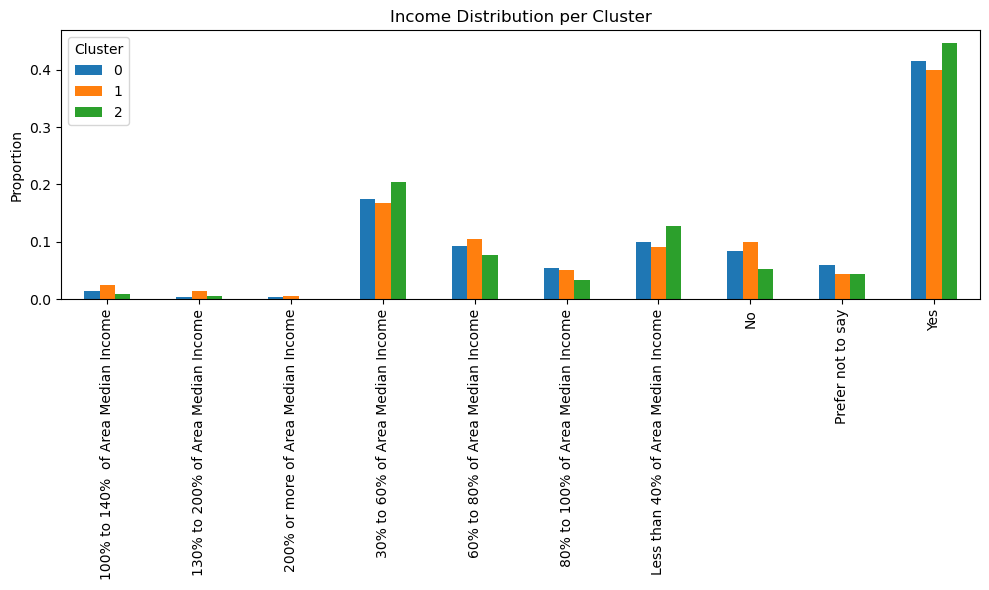

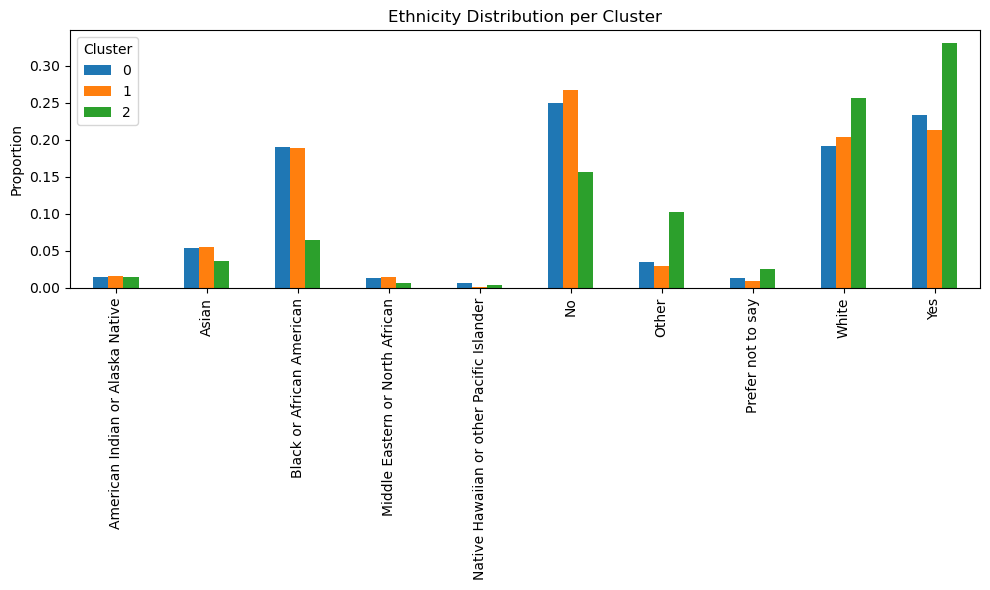

In [47]:
import matplotlib.pyplot as plt

if not income_cluster.empty:
    (income_cluster.T).plot(kind='bar', figsize=(10,6))
    plt.title("Income Distribution per Cluster")
    plt.ylabel("Proportion")
    plt.legend(title='Cluster')
    plt.tight_layout()
    plt.show()

if not ethnicity_cluster.empty:
    (ethnicity_cluster.T).plot(kind='bar', figsize=(10,6))
    plt.title("Ethnicity Distribution per Cluster")
    plt.ylabel("Proportion")
    plt.legend(title='Cluster')
    plt.tight_layout()
    plt.show()
